In [147]:
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import proplot as plot

sys.path.append('/Users/46h/Research/code/accphys/')
from tools import plotting as myplt
from tools import envelope_analysis as ea

In [148]:
plot.rc['figure.facecolor'] = 'white'
plot.rc['cycle'] = 'default'
plot.rc['style'] = None # https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
plot.rc['savefig.dpi'] = 'figure' # proplot default is 1200, which makes inline animations appear huge
dpi = 500

In [149]:
perveances = np.load('_output/data/perveances.npy')
cost_lists = np.load('_output/data/cost_lists.npy')
cost_lists = {'lsq': cost_lists[0], 'rba': cost_lists[1]}

tbt_params_lists = np.load('_output/data/tbt_params_lists.npy')
matched_params_lists = [np.array([tbt_params[0] for tbt_params in tbt_params_list]) for tbt_params_list in tbt_params_lists]

tbt_stats_lists = []
for tbt_params_list in tbt_params_lists:
    tbt_stats_list = []
    for tbt_params in tbt_params_list:
        tbt_stats = ea.Stats(mode=1)
        tbt_stats.read_env(tbt_params)
        tbt_stats_list.append(tbt_stats)
    tbt_stats_lists.append(tbt_stats_list)

tbt_stats_lists = {'lsq': tbt_stats_lists[0], 'rba': tbt_stats_lists[1]}
matched_params_lists = {'lsq': matched_params_lists[0], 'rba': matched_params_lists[1]}
nsamples = len(perveances)

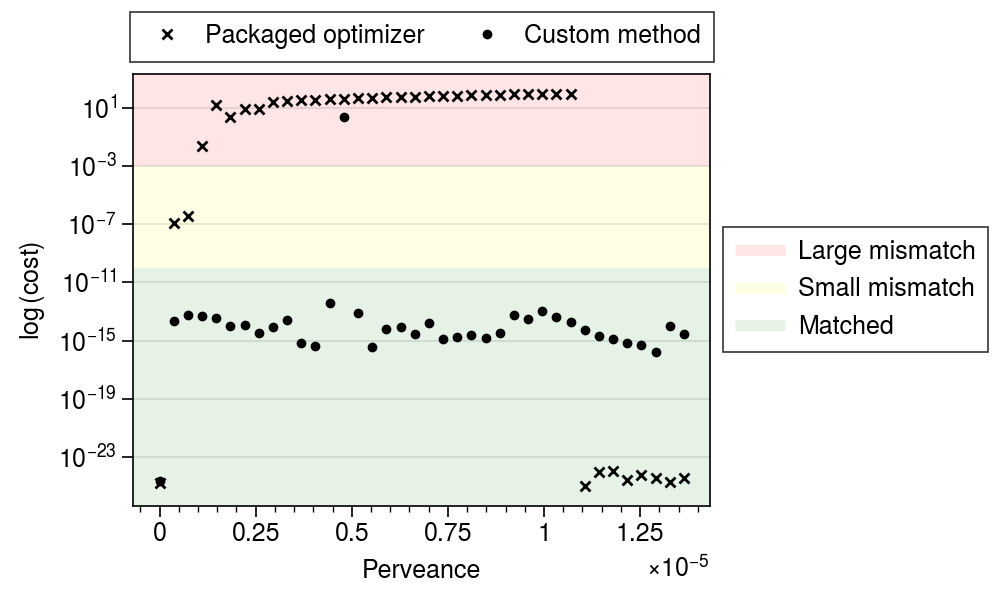

In [150]:
fig, ax = plot.subplots(figsize=(5, 3))
start = 0
skip = 2
alpha = 0.1

cmap = 'fire_r'
cmap_range = (0, 0.9)
cycle = myplt.colorcycle(plot.Colormap(cmap), len(perveances[start::skip]), cmap_range)
ax.set_prop_cycle(cycle)
g1 = ax.plot(perveances[start::skip], cost_lists['lsq'][start::skip], lw=0, marker='x', ms=3.5, color='k')
g2 = ax.plot(perveances[start::skip], cost_lists['rba'][start::skip], lw=0, marker='.', ms=5, color='k')
ax.format(xlabel='Perveance', ylabel=r'$log\,(cost)$', yscale='log', yformatter='log')
ax.legend([g1, g2], labels=['Packaged optimizer', 'Custom method'], ncols=2, loc='t')
ax.grid(axis='x')

ylim = ax.get_ylim()
ax.axhspan(0, 1e-10, facecolor='green', alpha=alpha)
ax.axhspan(1e-10, 1e-3, facecolor='yellow', alpha=alpha)
ax.axhspan(1e-3, 1e10, facecolor='red', alpha=alpha)
ax.set_ylim(ylim)
custom_lines = [Line2D([0], [0], color='red', lw=4, alpha=alpha),
                Line2D([0], [0], color='yellow', lw=4, alpha=alpha),
                Line2D([0], [0], color='green', lw=4, alpha=alpha)]
ax.legend(custom_lines, ['Large mismatch', 'Small mismatch', 'Matched'], ncols=1, loc='r')

plt.savefig('_output/figures/costfunc.png', dpi=dpi, facecolor='white')

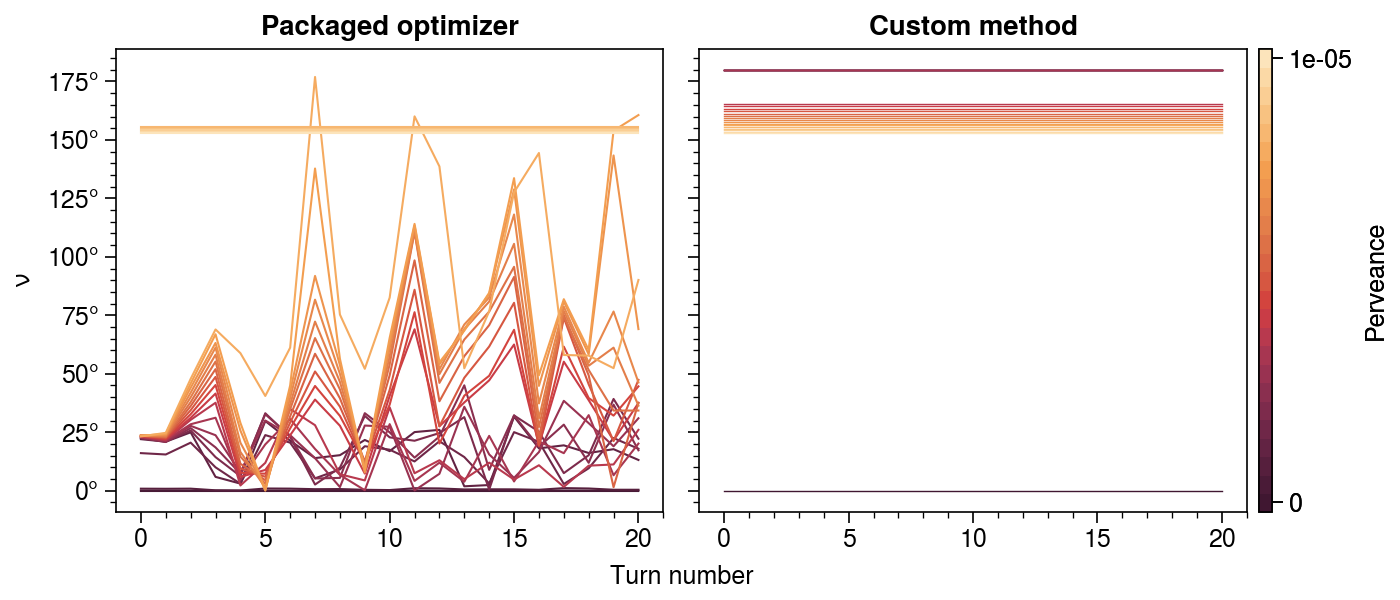

In [175]:
start, stop, step = (0, -1, 3)
peverances_subset = perveances[start:stop:step]
cmap = 'fire_r'
cmap_range = (0, 0.9)
cycle = myplt.colorcycle(plot.Colormap(cmap), len(peverances_subset), cmap_range)

fig, axes = plot.subplots(ncols=2, figsize=(7, 3))
for ax, method in zip(axes, ['lsq', 'rba']):
    axes.set_prop_cycle(cycle)
    tbt_stats_lists_subset = tbt_stats_lists[method][start:stop:step]
    for i, stats in enumerate(tbt_stats_lists_subset):
        data = stats.twiss4D['nu'].values
        if i == 0:
            data = np.full(len(data), 0.0)
        colorbar = 'r' if method == 'rba' else None
        lw = 0.75 if method == 'lsq' else 0.5
        ax.plot(data, marker=None, ms=None, lw=lw, colorbar=colorbar, 
                colorbar_kw=dict(label='Perveance', width='0.5em', ticklabels=['0', '{:.0e}'.format(peverances_subset[-1])], 
                                 ticks=[0, len(peverances_subset)-1], pad=-50))
    ax.format(grid=False, xlabel='Turn number', ylabel=r'$\nu$', yformatter='deg', toplabels=['Packaged optimizer', 'Custom method'])

plt.savefig('_output/figures/tbt_{}.png'.format(cmap), dpi=dpi, facecolor='white')